In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

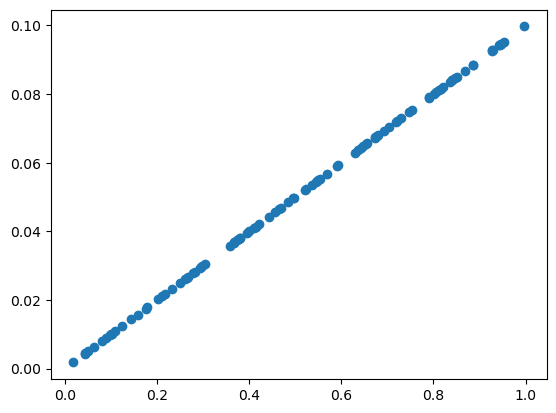

In [2]:
X = np.random.rand(100)
y = 0.2 * X * 0.5  #ax+b

plt.scatter(X,y)

In [3]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [4]:
# 경사하강법 y=wX+b , w결정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5 #임의 값

Epoch 0, W : 0.9619, Error : 0.2627


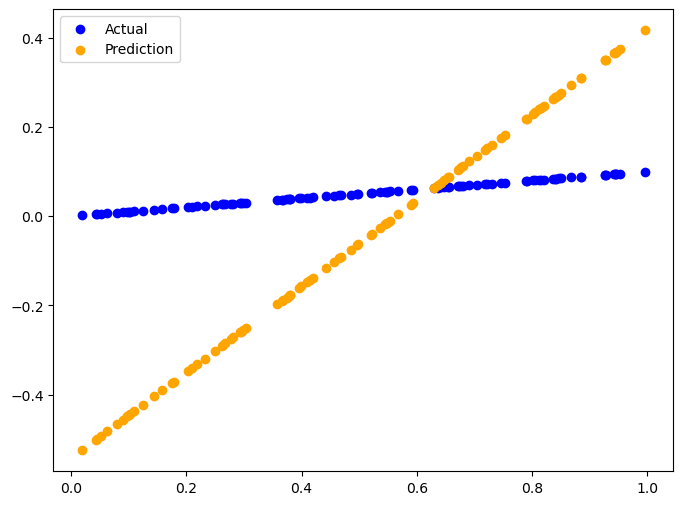

Epoch 10, W : 0.7577, Error : 0.1628


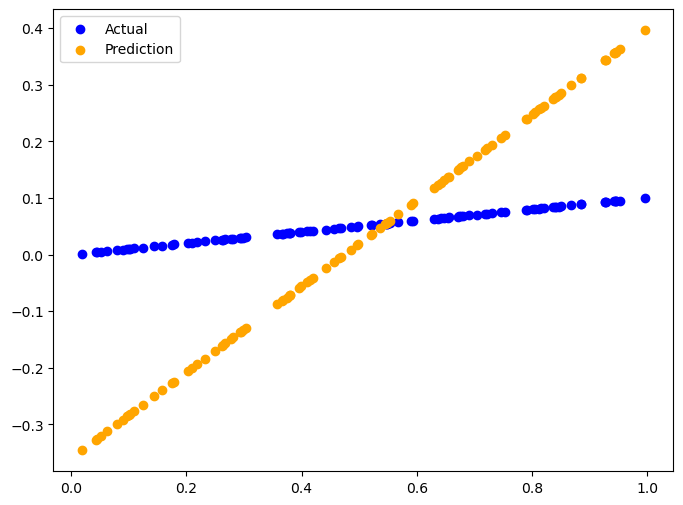

Epoch 20, W : 0.5850, Error : 0.1201


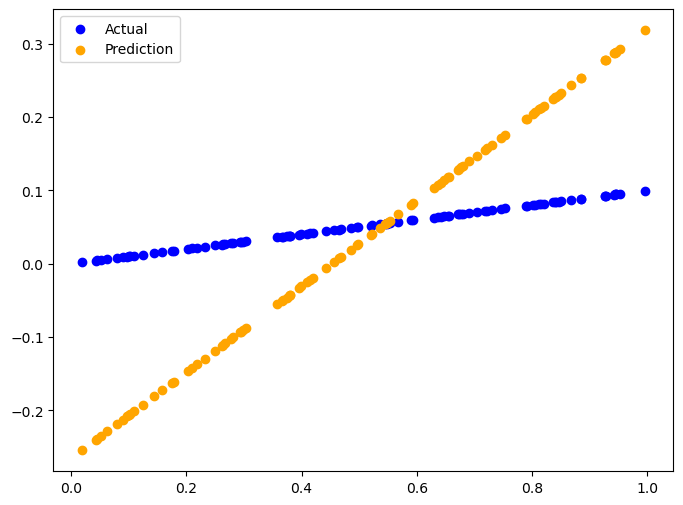

Epoch 30, W : 0.4577, Error : 0.0885


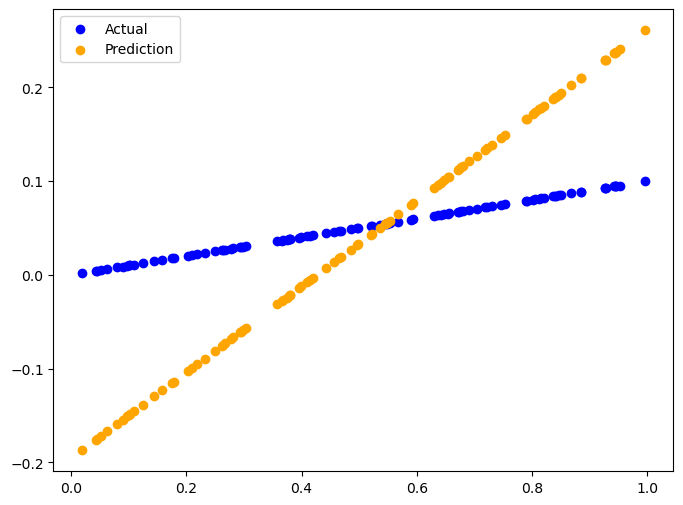

Epoch 40, W : 0.3637, Error : 0.0653


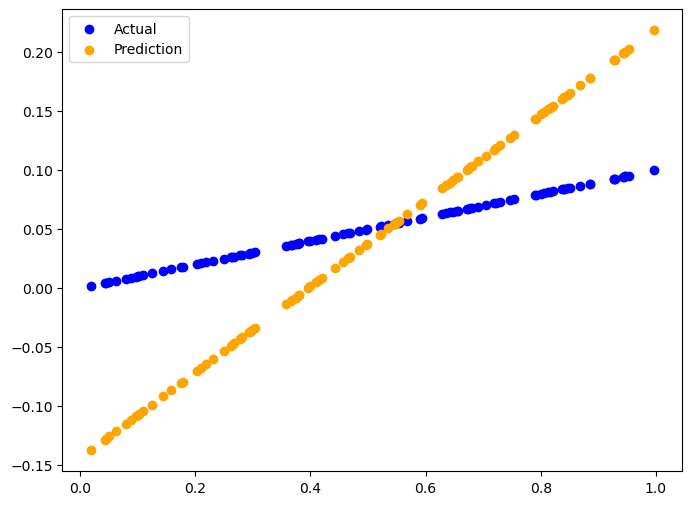

Epoch 50, W : 0.2945, Error : 0.0482


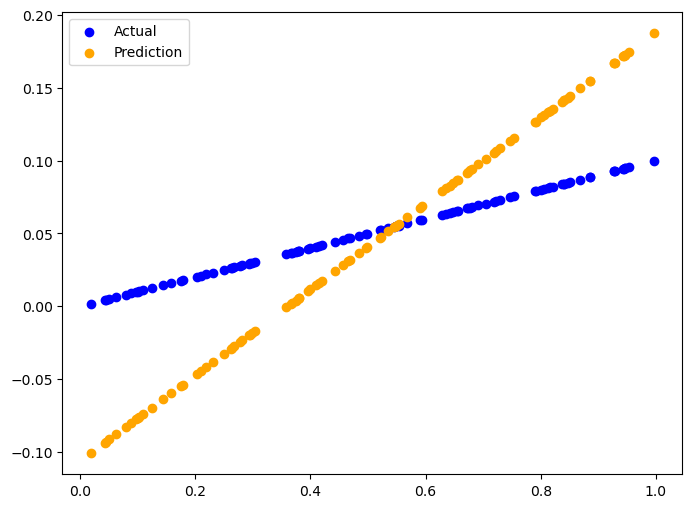

Epoch 60, W : 0.2434, Error : 0.0355


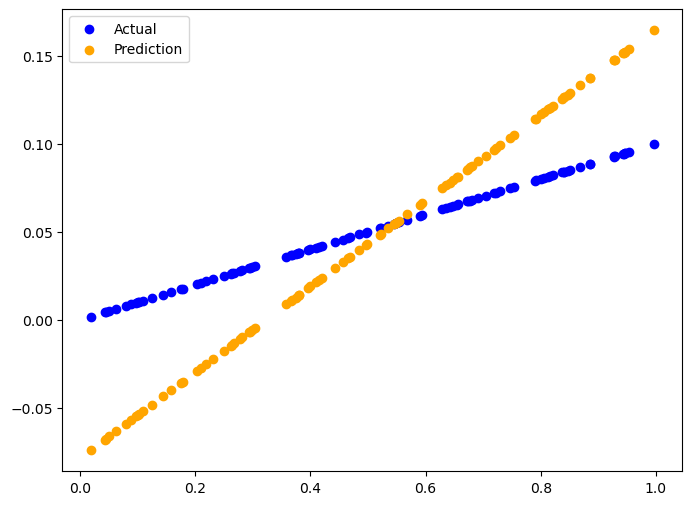

Epoch 70, W : 0.2058, Error : 0.0262


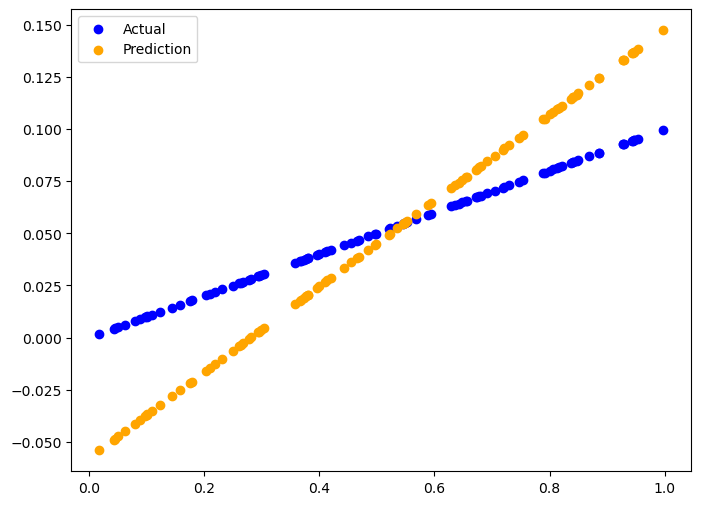

Epoch 80, W : 0.1780, Error : 0.0193


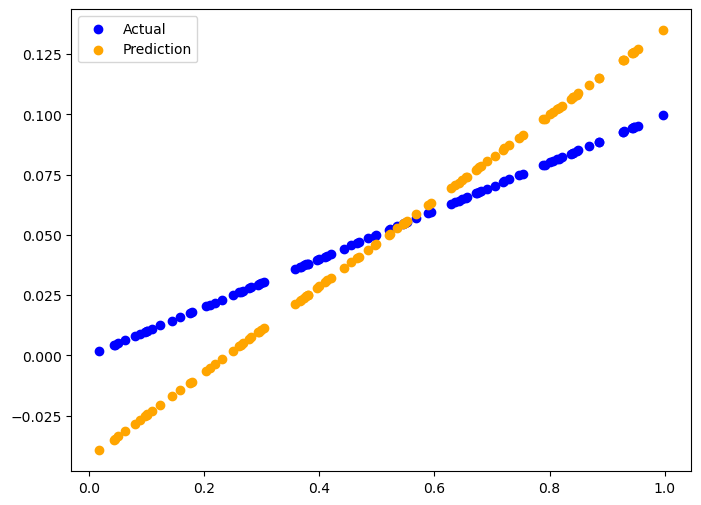

Epoch 90, W : 0.1575, Error : 0.0142


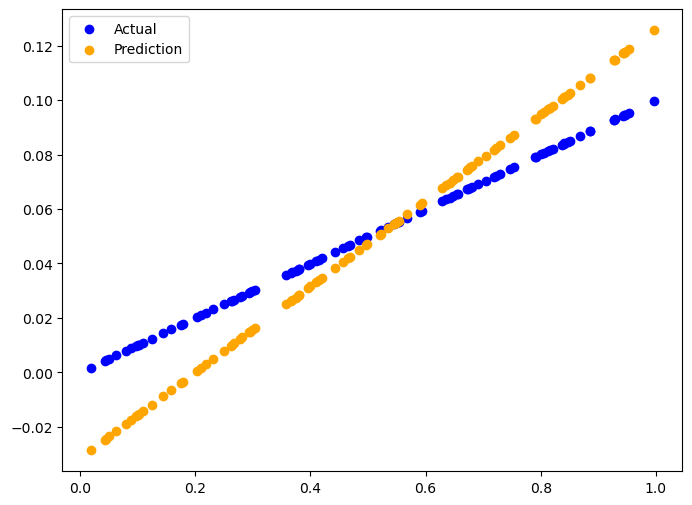

In [5]:
for epoch in range(100):
  y_pred = W * X + b
  error = np.abs(y_pred - y ).mean()
  if error < 0.001 : 
    break
  W_descent = learning_rate * ( (y_pred - y)*X).mean()
  b_descent = learning_rate * ( (y_pred - y).mean())
  W = W - W_descent
  b = b - b_descent
  
  if epoch%10 == 0 : 
    print( f'Epoch {epoch}, W : {W:.4f}, Error : {error:.4f}')
    y_pred = W * X + b
    plt_prediction(y_pred, y)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
boston_df = pd.read_csv("./data/boston.csv")
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
X = boston_df.drop('target', axis=1).values
y = boston_df['target'].values
boston_df.shape

(506, 14)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred[:3]

array([28.99672362, 36.02556534, 14.81694405])

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(4.928602182665338), np.float64(24.291119474973534))

In [11]:
lr.intercept_, lr.coef_

(np.float64(30.24675099392418),
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

In [17]:
r2_score(y_test, y_pred)

np.float64(0.6687594935356318)

In [13]:
pd.Series(data = np.round(lr.coef_, 1), index=boston_df.drop('target', axis=1).columns).sort_values(ascending=False)

RM          4.4
CHAS        2.8
RAD         0.3
INDUS       0.0
ZN          0.0
B           0.0
TAX        -0.0
AGE        -0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -17.2
dtype: float64

In [18]:
from sklearn.model_selection import cross_val_score
nmse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)

In [23]:
RMSE = np.sqrt(nmse*-1)

np.mean(RMSE), RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [24]:
r2 = cross_val_score(lr, X, y, scoring='r2', cv=5)
r2, np.mean(r2)

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))